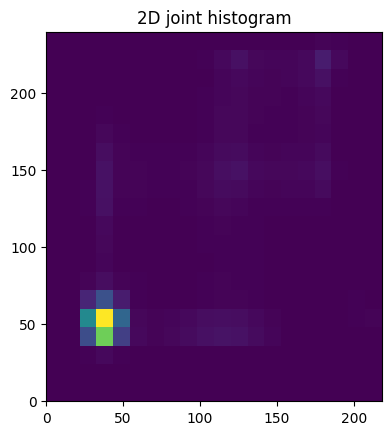

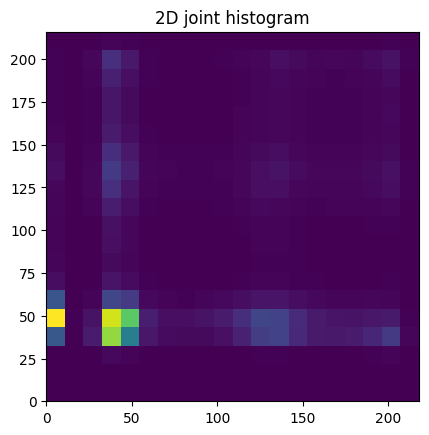

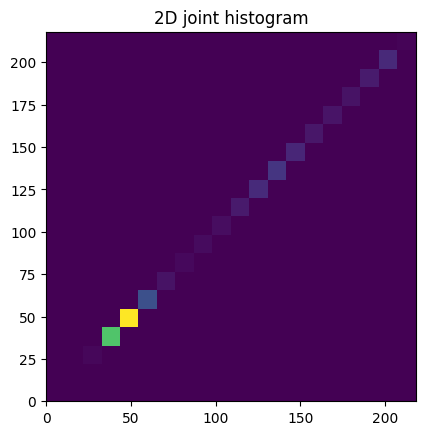

In [1]:
#question4
#1,2)
import cv2
import numpy as np
# Interaction function 
def Event_Mouse(event, x, y, flags, param) :
	# Left click mouse 
    if event == cv2.EVENT_LBUTTONDOWN :
    	# Add seeds
        seeds.append((y, x)) 
        # Draw solid dots 
        cv2.circle(MRI, center = (x, y), radius = 2,
                  color = (0, 0, 255), thickness = -1)
        cv2.circle(MRI2, center = (x, y), radius = 2,
                  color = (0, 0, 255), thickness = -1)

def Event_Show(img):
    cv2.namedWindow('img')
    cv2.setMouseCallback('img', Event_Mouse)
    cv2.imshow('img', img)

    while True :
        cv2.imshow('img', img)
        if cv2.waitKey(1) & 0xFF == ord('s') :
            break
    cv2.destroyAllWindows()

if __name__ == '__main__':
    MRI2 = cv2.imread('Color_MRI2.png',0) #Image to be aligned
    MRI = cv2.imread('Color_MRI.png',0) #Reference image
    height, width = MRI.shape
    seeds = []
    Event_Show(MRI)
    Event_Show(MRI2)

# which seeds blong to which image    
seed1= seeds[0:int(len(seeds)/2)]   #seeds blong to MRI 
seed2 = seeds[int(len(seeds)/2):len(seeds)] #seeds blong to MRI2
#3)
seed1 = np.float32(seed1[:])
seed2= np.float32(seed2[:])
h, status = cv2.findHomography(seed1, seed2,cv2.RANSAC)
im_out=cv2.warpPerspective(MRI2, h, (MRI.shape[0],MRI.shape[1]))
cv2.imshow("Source Image", MRI);
cv2.imshow("Destination Image", MRI2);
cv2.imshow("Warped Image", im_out);
cv2.waitKey(0);
cv2.destroyAllWindows()
#4)
import matplotlib.pyplot as plt 
import cv2
import numpy as np
def joint_histogram(x,y):
    H,xedges, yedges=np.histogram2d(x, y, bins=20, range=None, density=False, weights=None)
    fig=plt.figure()
    ax = fig.add_subplot(111, title='2D joint histogram',aspect='equal')
    X, Y = np.meshgrid(xedges, yedges)
    ax.pcolormesh(X, Y, H)
#5)

x=MRI.ravel()
y=MRI2.ravel()
joint_histogram(x,y)

x=MRI.ravel()
y=im_out.ravel()
joint_histogram(x,y)

y=x
joint_histogram(x,y)

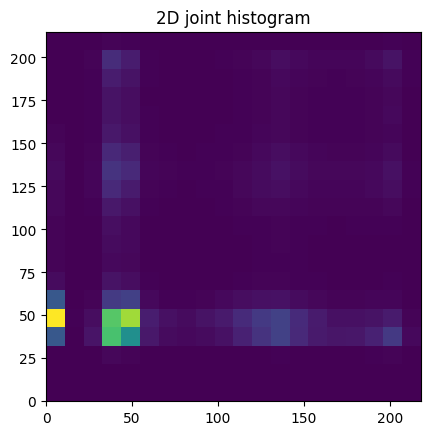

In [19]:

x=MRI.ravel()
y=im_out.ravel()
joint_histogram(x,y)

In [ ]:
y=x
joint_histogram(x,y)